<a href="https://colab.research.google.com/github/caumannerman/cg_project/blob/main/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 설치
!pip install -U finance-datareader
!pip install beautifulsoup4
!pip install pykrx
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from pykrx import stock
import requests
from io import BytesIO

In [27]:
# 헤더 부분에 리퍼러(Referer)를 추가
# 리퍼러란 링크를 통해서 각각의 웹사이트로 방문할 때 남은 흔적(로봇으로 인식하지 않기 위해)
# generate.cmd에서 Request URL 가져오기
gen_otp_url = 'https://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
headers = {'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader'}
# download.cmd에서 General의 Request URL 부분
down_url = 'https://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
#########   여기까지가 변하지 않는 것들     #########

# otp = requests.post(gen_otp_url, gen_otp_data, headers=headers).text



# # requests의 post 함수를 사용 해당 url에 접속하여 otp코드 제출
# down_sector_KS = requests.post(down_url, {'code': otp}, headers=headers)

# # 다운 받은 csv파일을 pandas의 read_csv 함수로 불러오기
# # read_csv 함수의 argment에 적합할 수 있도록 ByteIO 함수를 이용하여 바이너리 스트림 형태로 만든다
# sector_KS = pd.read_csv(BytesIO(down_sector_KS.content), encoding='EUC-KR')

# generate.cmd에서 Form Data와 동일
# Total_data=pd.DataFrame()

# headers = {'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader'} 

In [28]:
# 이곳에 업종이름을 Key로 하여 빈 배열을 value로 갖는 딕셔너리를 만들어야함.
sector_list = set()
# 2022년 1월 1일 기준으로 존재하는 모든 업종을 sector_list에 담을 것이다. 
# 아래의 기간만 늘리면, 더 넓은 기간의 업종명을 담을 수 있다.
for i in range(20220101,20220131):
    gen_otp_data={
        'locale': 'ko_KR',
        'mktId': 'STK',
        'trdDd': str(i),
        'money': '1',
        'csvxls_isNo': 'false',
        'name': 'fileDown',
        'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
    }
    otp = requests.post(gen_otp_url, gen_otp_data, headers=headers).text
    down_sector_KS = requests.post(down_url, {'code': otp}, headers=headers)
    # 이것이 해당 일자의 DataFrame
    sector_KS = pd.read_csv(BytesIO(down_sector_KS.content), encoding='EUC-KR')
    # NaN을 제거
    sector_KS = sector_KS.dropna()
    # sector_data=sector_KS[["종목코드", "종목명","업종명","등락률"]]
    sector_data=sector_KS[["업종명"]]
    # 하루 데이터를 갖고올 때마다, data 길이만큼 다 돌며 업종명을 다 set에 추가한다.
    for i in range(len(sector_data)):
      sector_list.add(sector_data.iloc[i]['업종명'])
sector_list = list(sector_list)
print(sector_list)

['의료정밀', '전기가스업', '기타제조업', '증권', '보험', '기타금융', '전기전자', '광업', '운수창고업', '기계', '비금속광물', '철강금속', '종이목재', '농업, 임업 및 어업', '의약품', '섬유의복', '은행', '서비스업', '화학', '통신업', '유통업', '건설업', '음식료품', '운수장비']


In [30]:
datelist = pd.date_range('2022-12-01', '2022-12-31', freq='B')

In [31]:
df = pd.DataFrame(columns = sector_list, index = datelist)

In [32]:
# sector_list를 사용하여 하루마다의 업종별 등락률 평균을 담을 dictionary를 만든다
total_fluc_rate_dict = dict()

In [33]:
# total_fluc_rate_dict에 각 업종 이름을 key로 하여 빈 배열을 value로 초기화한다
for i in sector_list:
  total_fluc_rate_dict[i] = []
print(total_fluc_rate_dict)

{'의료정밀': [], '전기가스업': [], '기타제조업': [], '증권': [], '보험': [], '기타금융': [], '전기전자': [], '광업': [], '운수창고업': [], '기계': [], '비금속광물': [], '철강금속': [], '종이목재': [], '농업, 임업 및 어업': [], '의약품': [], '섬유의복': [], '은행': [], '서비스업': [], '화학': [], '통신업': [], '유통업': [], '건설업': [], '음식료품': [], '운수장비': []}


In [34]:
gen_otp_data={
        'locale': 'ko_KR',
        'mktId': 'STK',
        'trdDd': str(20220101),
        'money': '1',
        'csvxls_isNo': 'false',
        'name': 'fileDown',
        'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
    }
temp_otp = requests.post(gen_otp_url, gen_otp_data, headers=headers).text
aaaaa = requests.post(down_url, {'code': temp_otp}, headers=headers)
# 이것이 해당 일자의 DataFrame
bbbbb = pd.read_csv(BytesIO(aaaaa.content), encoding='EUC-KR')
bbbbb = bbbbb.dropna(axis=0)
bbbbb
print(len(bbbbb))

0


In [36]:
korea_weekday_list = []

In [ ]:
# 20221201~20221231까지의 매일 각 기업의 '종목코드','종목명','업종명','등락률'을 표시하여 sector_data로 print
# NaN 데이터가 있는 열을 dropna.()로 지웠음
for i in range(20220101,20221231):
    gen_otp_data={
        'locale': 'ko_KR',
        'mktId': 'STK',
        'trdDd': str(i),
        'money': '1',
        'csvxls_isNo': 'false',
        'name': 'fileDown',
        'url': 'dbms/MDC/STAT/standard/MDCSTAT03901'
    }
    otp = requests.post(gen_otp_url, gen_otp_data, headers=headers).text
    down_sector_KS = requests.post(down_url, {'code': otp}, headers=headers)
    # 이것이 해당 일자의 DataFrame
    sector_KS = pd.read_csv(BytesIO(down_sector_KS.content), encoding='EUC-KR')
    
    # NaN을 제거
    sector_KS = sector_KS.dropna(axis=0)
    # 주말같은 경우 빈 DataFrame이 된다. 이럴 때는 continue해서 넘어가야함  
    if len(sector_KS) == 0:
      continue
    #평일인 경우 korea_weakday_list에 평일 목록을 추가한다.
    else:
      # 형식을 2022-01-02 형태 
      korea_weekday_list.append(str(str(i)[:4]) + "-" + str(str(i)[4:6]) + "-" + str(str(i)[6:]))
      # 최종적으로 korea_weakday_list에는 우리나라 평일이 다 담길 것 
    # sector_data=sector_KS[["종목코드", "종목명","업종명","등락률"]]
    sector_data = sector_KS[["업종명","등락률"]]
    # print(sector_data)
    
    # print(sector_data)
    # for 문을 하나 더 써서,여기서 이제 업종명 별 등락률 다 더해서 평균내고, total_fluc_rate_dict에 하나씩 담는다.
    for j in range(len(sector_list)):
      now_sector = sector_data.loc[sector_data["업종명"] == sector_list[j] , :]
      now_avg = now_sector[["등락률"]].mean()
      df.iloc[:,j].loc[str(i)] = now_avg
      total_fluc_rate_dict[sector_list[j]].append(now_avg[0])
      #print(total_fluc_rate_dict)
     
    #sector_data
    #print(sector_data)

    # 윗줄까지 해서, sector_KS는 하루치/ 당일 상장되어있는 모든 종목의 정보 다 담겨있음 - 완료
    # 각 업종 별 평균 구해서 / 각 업종 별 일별 등락율 평균 담을 배열에 추가
    #a b c d
    #for j in (len(업종 다 들어있는 리스트)): 
    #one_month_data_dict["서비스업"].append(방금 구한 평균)
    #Total_data = pd.concat([Total_data, sector_KS], ignore_index=False)

In [ ]:
type(total_fluc_rate_dict)

dict

In [22]:
Total_sector=pd.Series(total_fluc_rate_dict)
Total_sector

의료정밀           [1.7525, 0.6900000000000001, -1.39999999999999...
전기가스업          [-0.22000000000000003, 0.09454545454545453, -0...
기타제조업          [-0.526, 0.6240000000000001, -0.68066666666666...
증권             [-0.4380645161290323, 0.35258064516129034, -0....
보험             [-0.26066666666666666, 2.624, 1.61266666666666...
기타금융           [0.10488888888888886, 0.5905555555555555, -0.6...
전기전자           [0.44932432432432423, 0.14229729729729731, -0....
광업             [13.76, -0.6, -5.27, -6.21, 0.91, 9.95, -1.65,...
운수창고업          [0.9967857142857142, 0.2364285714285714, -0.64...
기계             [0.78, 0.9809302325581395, 0.8095348837209303,...
비금속광물          [-0.3033333333333334, 2.39962962962963, 0.4492...
철강금속           [1.274423076923077, 1.8136538461538467, 0.6784...
종이목재           [0.9457142857142858, 0.48666666666666664, 2.17...
농업, 임업 및 어업    [0.05250000000000005, 0.065, 0.4325, 0.7575000...
의약품            [0.9603846153846152, -0.3284615384615384, -1.6...
섬유의복           [-0.427692

In [10]:
len(Total_sector['은행'])

246

In [20]:
df=pd.DataFrame(total_fluc_rate_dict) 
#index =pd.date_range('2022-01-01', '2022-12-31', freq='B'))

In [21]:
df

,의료정밀,전기가스업,기타제조업,증권,보험,기타금융,전기전자,광업,운수창고업,기계,...,의약품,섬유의복,은행,서비스업,화학,통신업,유통업,건설업,음식료품,운수장비
0,1.75250,-0.220000,-0.526000,-0.438065,-0.260667,0.104889,0.449324,13.76,0.996786,0.780000,...,0.960385,-0.427692,-0.106667,0.618020,0.247686,0.8125,-0.035075,1.298611,0.260851,0.342308
1,0.69000,0.094545,0.624000,0.352581,2.624000,0.590556,0.142297,-0.60,0.236429,0.980930,...,-0.328462,1.219231,-0.746667,-0.024950,1.212893,-0.5550,0.974627,1.284444,0.431489,1.280308
2,-1.40000,-0.284545,-0.680667,-0.818387,1.612667,-0.639451,-0.979726,-5.27,-0.649286,0.809535,...,-1.664615,0.333462,0.100000,-0.658911,-0.838264,0.7550,-0.611343,0.674444,-0.210426,0.652154
3,-2.75625,-1.612727,-0.540000,-1.540323,-0.411333,-1.015714,-1.736164,-6.21,-0.835000,-1.002791,...,-1.494423,-0.226154,-0.666667,-1.399604,-0.935455,-0.2700,-1.157313,0.463333,-0.750426,-0.509077
4,1.49875,0.140909,0.212667,0.825806,1.343333,1.137912,1.903014,0.91,0.521786,1.765116,...,0.357308,-0.205769,0.703333,0.822772,1.877273,-1.0950,0.764030,1.009722,1.137872,1.055692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,-3.15125,-1.626000,-1.716667,-0.965806,-0.746667,-0.863956,-2.483816,-3.51,-1.362857,-2.256190,...,-2.983889,-1.634000,-4.600000,-1.274500,-1.696942,-1.2500,-2.156119,-1.625263,-1.165000,-1.958769
242,-0.01500,-0.751000,-0.669333,0.100323,-0.117333,0.268242,-0.318289,-3.31,-0.134286,0.106429,...,0.414074,-0.218400,-1.776667,-0.331600,-0.102562,0.2940,-0.623433,-0.171316,-0.492391,-0.782154
243,1.08750,0.061000,1.368667,0.422258,0.038000,0.938791,0.756053,0.00,1.852500,1.179762,...,-0.031852,0.916800,4.036667,0.752500,1.695702,1.4740,1.184179,0.760000,0.716522,0.826000
244,-0.98750,0.541000,-1.680667,-4.906452,-1.636667,-2.011319,-0.999342,-3.94,0.293214,0.337619,...,-1.172963,-0.985600,0.343333,-1.367100,-1.741488,-3.4380,-0.870896,-1.948421,-0.729783,-1.028615


In [15]:
!pip install fredapi
from fredapi import Fred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
fred = Fred(api_key = '2c9e191850838f3f097d53ea9dd1101b')
DGS2 = fred.get_series('DGS2').loc['2022':'2022-12-31'].dropna()
DGS2=pd.DataFrame(DGS2)
DGS2.columns = ["미국채_2Y"]
DGS2

,미국채_2Y
2022-01-03,0.78
2022-01-04,0.77
2022-01-05,0.83
2022-01-06,0.88
2022-01-07,0.87
...,...
2022-12-23,4.31
2022-12-27,4.32
2022-12-28,4.31
2022-12-29,4.34


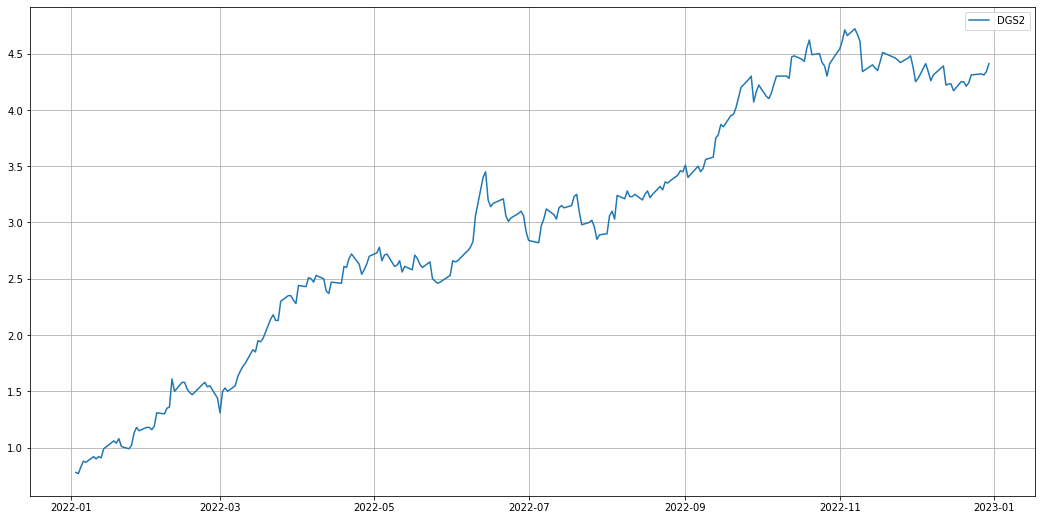

In [19]:
"plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (18,9)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
plt.plot(DGS2, label = 'DGS2')
plt.legend()
plt.show()